In [1]:
import sys
#!conda install --yes --prefix {sys.prefix} pandas
import pandas as pd

filename = 'heart' #name of csv data file
df = pd.read_csv(filename + '.csv')  #load data as a pandas dataframe
df['time'] = df.index
df['intensity'] = pd.to_numeric(df['intensity'], errors='coerce')
# Drop NaN values from that column
df.dropna(subset=['intensity'], inplace=True)
df.head(6) 


,intensity,time
0,345.0,0
1,363.0,1
2,378.0,2
3,390.0,3
4,396.0,4
5,397.0,5


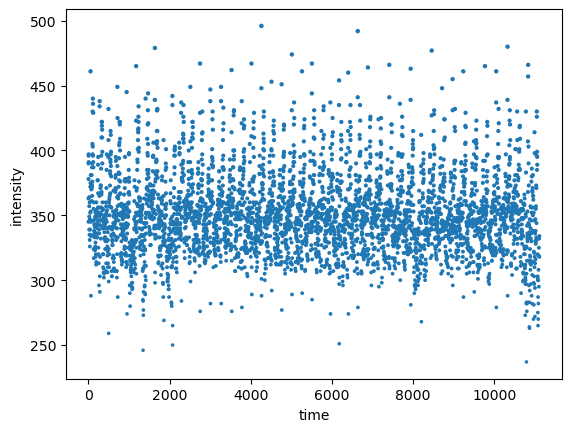

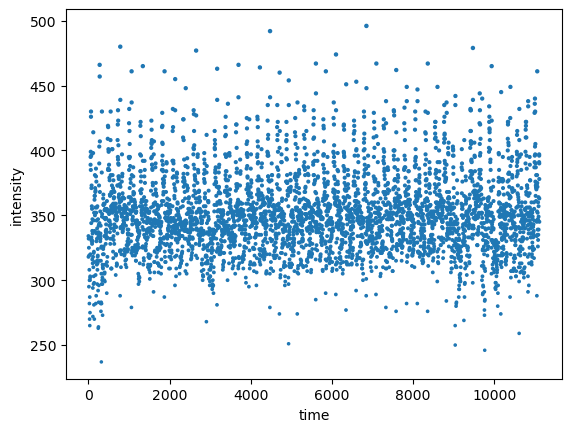

In [2]:
import sys
#!conda install --yes --prefix {sys.prefix} matplotlib

import matplotlib.pylab as plt  #import library for plotting, https://pypi.org/project/matplotlib/

time = df['time'].values    #this is a numpy array (not a list), you can do mathematical operations directly on the object
intensity = df['intensity'].values 

plt.scatter(time, intensity, s=intensity * 0.01)
plt.xlabel('time')
plt.ylabel('intensity')
plt.show()

times_millis = max(time) - time 

plt.scatter(times_millis, intensity, s=intensity*0.01)
plt.xlabel('time')
plt.ylabel('intensity')
plt.show()

In [3]:
def map_value(value, min_value, max_value, min_result, max_result):
    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result

In [4]:
millis_per_beat = 930  #number of Myrs for each beat of music 

t_data = times_millis/millis_per_beat #rescale time from Myrs to beats

duration_beats = max(t_data)  #duration in beats (actually, onset of last note)
print('Duration:', duration_beats, 'beats')

Duration: 11.94516129032258 beats


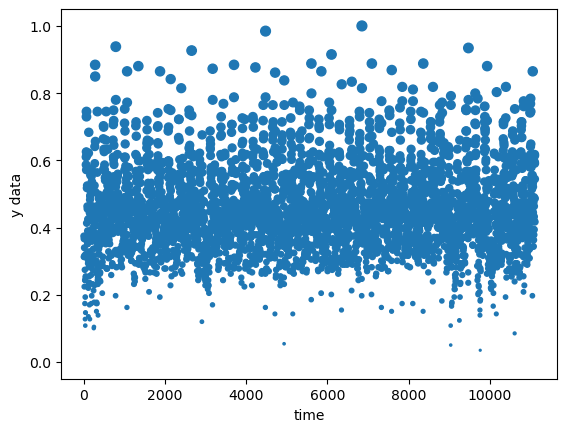

In [5]:
y_data = map_value(intensity, min(intensity), max(intensity), 0, 1) 
plt.scatter(times_millis, y_data, s=50*y_data)
plt.xlabel('time')
plt.ylabel('y data')
plt.show()

In [6]:
import sys
#!conda install --yes --prefix {sys.prefix} pip
#!{sys.executable} -m pip install audiolazy
from audiolazy import str2midi, midi2str

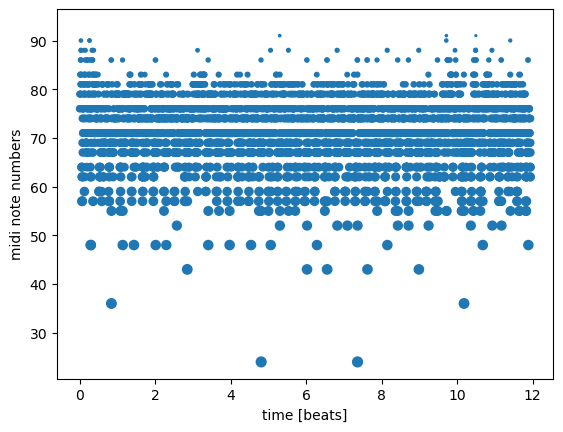

In [7]:
note_names = ['C1','C2','G2',
             'C3','E3','G3','A3','B3',
             'D4','E4','G4','A4','B4',
             'D5','E5','G5','A5','B5',
             'D6','E6','F#6','G6','A6']

note_midis = [str2midi(n) for n in note_names] 
n_notes = len(note_midis)

midi_data = []
for i in range(len(y_data)):
    note_index = round(map_value(y_data[i], 0, 1, n_notes-1, 0)) 
    midi_data.append(note_midis[note_index])
plt.scatter(t_data, midi_data, s=50*y_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

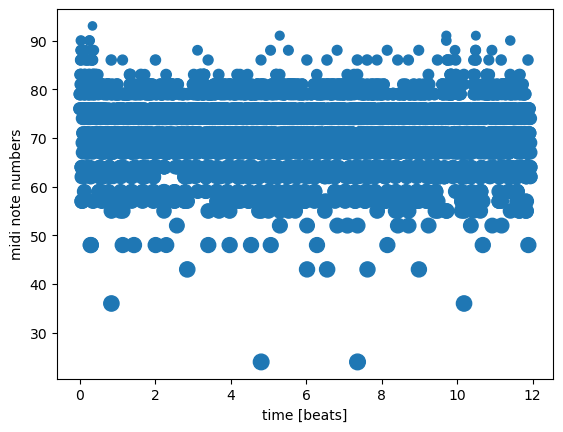

In [8]:
vel_min,vel_max = 35,127   #minimum and maximum note velocity
vel_data = []
for i in range(len(y_data)):
    note_velocity = round(map_value(y_data[i],0,1,vel_min, vel_max)) 
    vel_data.append(note_velocity)
    
plt.scatter(t_data, midi_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()


In [9]:
import sys
#!{sys.executable} -m pip install midiutil
from midiutil import MIDIFile 

bpm = 60  #beats per minute, if bpm = 60, 1 beat = 1 sec 
duration_sec = duration_beats*60/bpm #duration in seconds 
print('Duration:', duration_sec, 'seconds')

#create midi file object, add tempo
my_midi_file = MIDIFile(1) #one track 
my_midi_file.addTempo(track=0, time=0, tempo=bpm) 
#add midi notes
for i in range(len(t_data)):
    my_midi_file.addNote(track=0, channel=0, time=t_data[i], pitch=midi_data[i], volume=vel_data[i], duration=2)
#create and save the midi file itself
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f)

Duration: 11.94516129032258 seconds
